In [40]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acovf,acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
co2_df=pd.read_csv('https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/co2_data.csv',index_col='date',parse_dates=True)

<AxesSubplot:xlabel='date'>

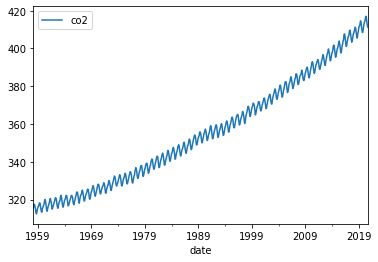

In [36]:
co2_df.plot()

In [37]:
auto_arima(co2_df,seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=495.449, Time=9.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2447.540, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1659.710, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2453.523, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1132.729, Time=8.83 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=776.540, Time=9.28 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=469.245, Time=21.55 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=612.270, Time=20.70 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=478.680, Time=23.59 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=526.920, Time=20.61 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=464.763, Time=19.88 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=462.330, Time=8.22 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1538.312, Time=1.98 sec
 ARIMA(1,1,2)(1,0,0)[12] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  752
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -206.911
Date:                              Sat, 30 Oct 2021   AIC                            425.821
Time:                                      09:32:33   BIC                            453.550
Sample:                                           0   HQIC                           436.505
                                              - 752                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3543      0.036     -9.965      0.000      -0.424      -0.285
ma.L2         -0.0381      0.032     -1.183      0.237      -0.101       0.025
ma.L3         -0.0729      0.031     -2.318      0.020      -0.135      -0.011
ar.S.L12       0.9996      0.000   2827.770      0.000       0.999       1.000
ma.S.L12      -0.8599      0.021    -40.338      0.000      -0.902      -0.818
sigma2         0.0944      0.005     20.316      0.000       0.085       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 2.94
Prob(Q):                              0.74   Prob(JB):                         0.23
Heteroskedasticity (H):               1.16   Skew:                             0.00
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from pmdarima import auto_arima
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<AxesSubplot:xlabel='date'>

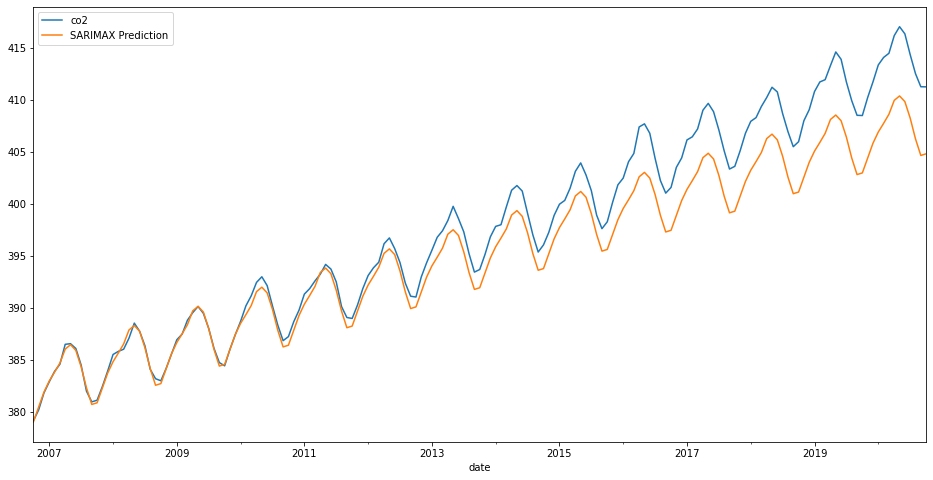

In [45]:
#arimax(4,0,2)
#480
train_df=co2_df.iloc[:583]
test_df=co2_df.iloc[583:]
mod=SARIMAX(train_df,order=(0,1,3),seasonal_order=(1,0,1,12))
res=mod.fit()
res.summary()

start=len(train_df)
end=len(train_df)+len(test_df)-1
prediction=res.predict(start,end,type='linear').rename('SARIMAX Prediction')
test_df.plot(figsize=(16,8),legend=True)
prediction.plot(legend=True)

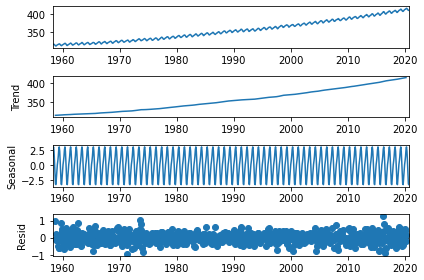

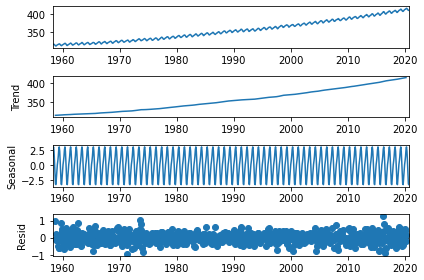

In [42]:
res=seasonal_decompose(co2_df,model='add')
res.plot()

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
co2_df.mean()
np.sqrt(mean_squared_error(test_df,prediction))

3.129644938073718

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<AxesSubplot:xlabel='date'>

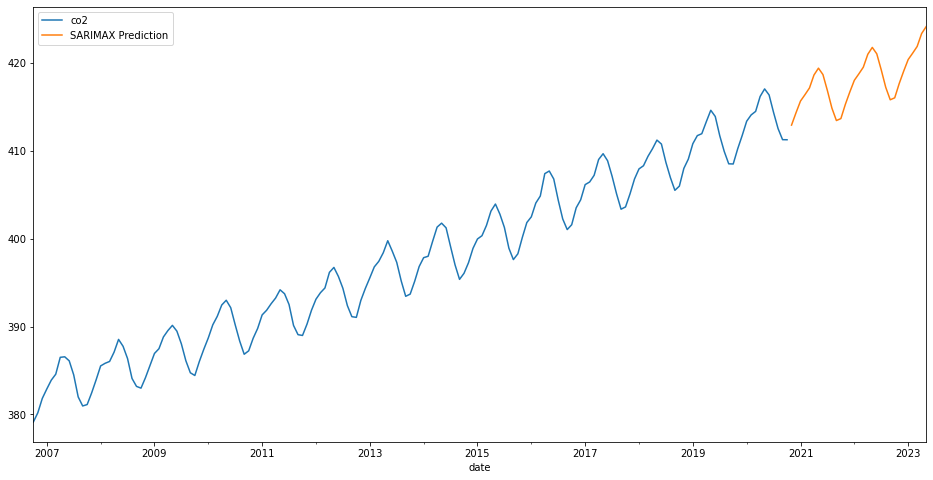

In [49]:
mod=SARIMAX(co2_df,order=(0,1,3),seasonal_order=(1,0,1,12))
res=mod.fit()
prediction=res.predict(len(co2_df),len(co2_df)+30,type='linear').rename('SARIMAX Prediction')
test_df.plot(figsize=(16,8),legend=True)
prediction.plot(legend=True)